# Martin Pring's Special K

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:pring_s_special_k

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2012-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,39.172771,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,39.383293,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,39.820515,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,40.236809,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,40.172970,98506100


In [3]:
import talib as ta

In [4]:
df['200MA'] = df['Adj Close'].rolling(200).mean()

In [5]:
df['SMA10'] = ta.SMA(df['Adj Close'], timeperiod=10)
df['SMA15'] = ta.SMA(df['Adj Close'], timeperiod=15)
df['SMA50'] = ta.SMA(df['Adj Close'], timeperiod=50)
df['SMA65'] = ta.SMA(df['Adj Close'], timeperiod=65)
df['SMA75'] = ta.SMA(df['Adj Close'], timeperiod=75)
df['SMA100'] = ta.SMA(df['Adj Close'], timeperiod=100)
df['SMA130'] = ta.SMA(df['Adj Close'], timeperiod=130)
df['SMA195'] = ta.SMA(df['Adj Close'], timeperiod=195)

df['ROC10'] = ta.ROC(df['SMA10'], timeperiod=10)
df['ROC15'] = ta.ROC(df['SMA10'], timeperiod=15)
df['ROC20'] = ta.ROC(df['SMA10'], timeperiod=20)
df['ROC30'] = ta.ROC(df['SMA15'], timeperiod=30)
df['ROC40'] = ta.ROC(df['SMA50'] , timeperiod=40)
df['ROC65'] = ta.ROC(df['SMA65'], timeperiod=65)
df['ROC75'] = ta.ROC(df['SMA75'], timeperiod=75)
df['ROC100'] = ta.ROC(df['SMA100'], timeperiod=100)
df['ROC195'] = ta.ROC(df['SMA130'], timeperiod=100)
df['ROC265'] = ta.ROC(df['SMA130'], timeperiod=265)
df['ROC390'] = ta.ROC(df['SMA130'], timeperiod=390)
df['ROC530'] = ta.ROC(df['SMA195'], timeperiod=530)

In [6]:
df['Special_K'] = (df['ROC10'] * 1) + (df['ROC15'] * 2) + (df['ROC20'] * 3) + (df['ROC30']) * 4 + (df['ROC40'] * 1) + (df['ROC65'] * 2) + (df['ROC75'] * 3) + (df['ROC100'] * 4) + (df['ROC195'] * 1) + (df['ROC265'] * 2) + (df['ROC390'] * 3) + (df['ROC530'] * 4)

In [7]:
df['200MAk'] = df['Special_K'].rolling(5).mean()

In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,200MA,SMA10,SMA15,SMA50,...,ROC40,ROC65,ROC75,ROC100,ROC195,ROC265,ROC390,ROC530,Special_K,200MAk
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,146.202972,37169200,191.863233,161.253418,165.541362,190.235452,...,-13.324551,-2.304339,2.222526,13.149966,12.893005,30.028210,53.104589,93.212859,489.719075,514.988971
2018-12-26,148.300003,157.229996,146.720001,157.169998,156.498810,58582500,191.750755,160.112312,163.705901,188.957578,...,-13.929970,-2.989888,1.555068,12.716938,12.591626,29.776356,52.542781,92.998107,480.152995,503.639532
2018-12-27,155.839996,156.770004,150.070007,156.149994,155.483154,53117100,191.641818,158.822841,162.342414,187.753657,...,-14.437053,-3.733504,0.932041,12.261841,12.271443,29.543304,52.027246,92.744358,470.768037,492.270350
2018-12-28,157.500000,158.520004,154.550003,156.229996,155.562820,42291400,191.540814,157.357127,161.115011,186.456269,...,-15.011695,-4.496865,0.236603,11.786793,11.945178,29.302134,51.551916,92.506584,459.513122,480.878122
2018-12-31,158.529999,159.360001,156.479996,157.740005,157.066376,35003500,191.446293,156.586433,160.401405,185.208005,...,-15.609825,-5.238232,-0.405377,11.345544,11.649848,29.085364,51.086435,92.290868,452.133505,470.457347


In [9]:
df = df.dropna()

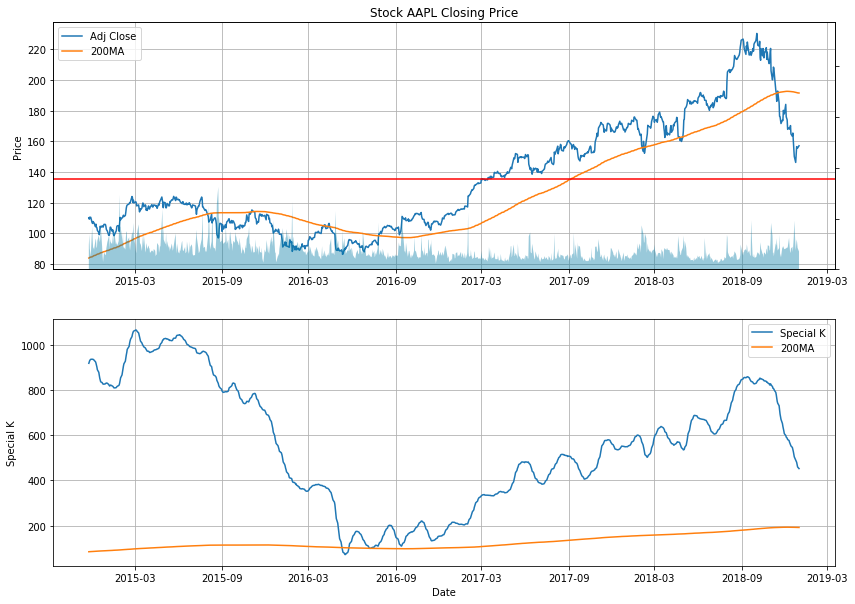

In [10]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['200MA'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Special_K'], label='Special K')
ax2.plot(df['200MA'])
ax2.grid()
ax2.set_ylabel('Special K')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Martin Pring Special K

In [11]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,200MA,SMA10,SMA15,...,ROC65,ROC75,ROC100,ROC195,ROC265,ROC390,ROC530,Special_K,200MAk,VolumePositive
0,735561.0,116.849998,118.769997,116.620003,118.629997,110.164543,47450800,83.885018,106.189037,104.413235,...,10.854965,14.557866,26.476303,27.096698,73.815509,83.215722,50.544718,918.554483,906.459956,False
1,735562.0,119.070000,119.750000,117.449997,117.599998,109.208054,68840400,84.092530,106.922665,104.999447,...,10.850087,14.572888,26.407198,27.132392,73.851305,83.905916,50.597225,924.898992,912.258654,False
2,735563.0,117.940002,119.099998,117.830002,119.000000,110.508148,40768300,84.306568,107.642360,105.656305,...,10.908165,14.618732,26.373178,27.170764,73.947263,84.543217,50.677496,931.439768,918.485212,False
3,735565.0,119.269997,119.400002,118.050003,118.930000,110.443123,24814400,84.514905,108.209758,106.289638,...,10.951785,14.674213,26.355542,27.202361,73.989789,85.213871,50.778852,936.166157,924.480533,False
4,735568.0,118.809998,119.250000,111.269997,115.070000,106.858582,83814000,84.705598,108.292406,106.664810,...,10.923983,14.660501,26.298912,27.189576,74.001695,85.876900,50.873773,936.711392,929.554158,False


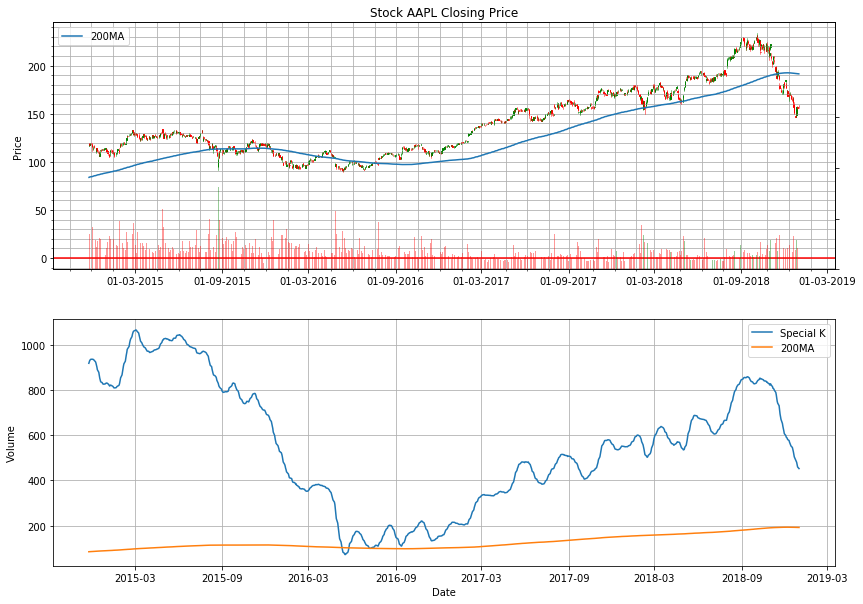

In [12]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.index, df['200MA'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Special_K'], label='Special K')
ax2.plot(df['200MA'])
ax1.axhline(y=0,color='r')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend(loc='best')